In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dataset.dataset import get_formated_data_frames
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import sklearn.cluster as skclust

In [2]:
formated_data_frame = get_formated_data_frames()

23-Apr-2022 15:30:55 DEBUG utils - Directory ./ already exists. Skipping.
23-Apr-2022 15:30:55 INFO GEOparse - File already exist: using local version.
23-Apr-2022 15:30:55 INFO GEOparse - Parsing ./GSE22552_family.soft.gz: 
23-Apr-2022 15:30:55 DEBUG GEOparse - DATABASE: GeoMiame
23-Apr-2022 15:30:55 DEBUG GEOparse - SERIES: GSE22552
23-Apr-2022 15:30:55 DEBUG GEOparse - PLATFORM: GPL570
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/GEOparse/GEOparse.py:401: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(StringIO(data), index_col=None, sep="\t")
23-Apr-2022 15:30:56 DEBUG GEOparse - SAMPLE: GSM559689
23-Apr-2022 15:30:57 DEBUG GEOparse - SAMPLE: GSM559690
23-Apr-2022 15:30:57 DEBUG GEOparse - SAMPLE: GSM559691
23-Apr-2022 15:30:57 DEBUG GEOparse - SAMPLE: GSM559692
23-Apr-2022 15:30:57 DEBUG GEOparse - SAMPLE: GSM559693
23-Apr-2022 15:30:57 DEBUG GEOparse - SAMPLE: GSM559694
23-Apr

# Task 1:

#### a. Log-transformation if needed; is it needed?

 - Log transformation is not needed since NCBI already provides the data log-transformed.

#### b. Imputation of missing values using mean values if needed; is it needed?


In [5]:
formated_data_frame.isna().any().any()

False

- b. Imputation of missing values is not needed because there is no missing values in the datafram

#### c. Quantile normalisation to remove batch effect


In [6]:
formated_data_frame.reset_index(['ID_REF', 'ENTREZ_GENE_ID'], inplace=True, drop=True)

In [7]:
formated_data_frame.reset_index('Gene Symbol', inplace=True)

In [8]:
formated_data_frame = formated_data_frame[list((formated_data_frame[formated_data_frame != 'nan']).notna()['Gene Symbol'].values)]

In [9]:
formated_data_frame.set_index('Gene Symbol', inplace=True)

In [10]:
# quantile normalization
tmp = np.mean(np.sort(formated_data_frame.values, axis=0), axis=1)
original_index = np.argsort(np.argsort(formated_data_frame.values, axis=0), axis=0)
data_quantile_normalised = pd.DataFrame(tmp[original_index], index=formated_data_frame.index, columns=formated_data_frame.columns)
data_quantile_normalised

,CFU,CFU,CFU,Pro,Pro,Pro,Int,Int,Int,Late,Late,Late
Gene Symbol,,,,,,,,,,,,
RFC2,8.298534,8.444854,8.164911,7.986351,8.550718,8.204636,7.907606,7.908747,7.358177,5.577324,5.661326,5.600129
HSPA6,6.303499,5.051694,5.846020,5.329881,5.596077,6.145693,6.838792,6.991463,7.253949,7.964431,8.221406,8.597004
PAX8,7.232854,6.869281,7.141075,7.224941,6.875421,7.138220,7.112243,7.148576,7.354053,7.834565,8.297725,8.264547
MIR5193,7.355842,6.657202,7.126263,6.833251,6.790137,7.240857,7.128137,7.067035,7.875824,6.686432,6.736515,6.665266
THRA,6.197104,6.916509,6.585987,6.371840,6.549105,6.604124,7.228325,6.950778,6.954926,8.182184,8.449651,8.544644
...,...,...,...,...,...,...,...,...,...,...,...,...
GAPDH,13.534037,13.434565,13.502557,13.334358,13.221470,13.378797,12.625150,12.692623,13.092930,12.734555,11.471327,11.681010
GAPDH,11.826451,12.083917,12.130884,12.049367,11.866731,12.025403,11.182008,11.193479,11.660083,9.976895,9.915214,9.767740
GAPDH,13.307831,12.967842,13.077377,13.101490,12.812694,12.961103,12.169533,12.207110,12.613446,12.006150,10.886764,10.973649


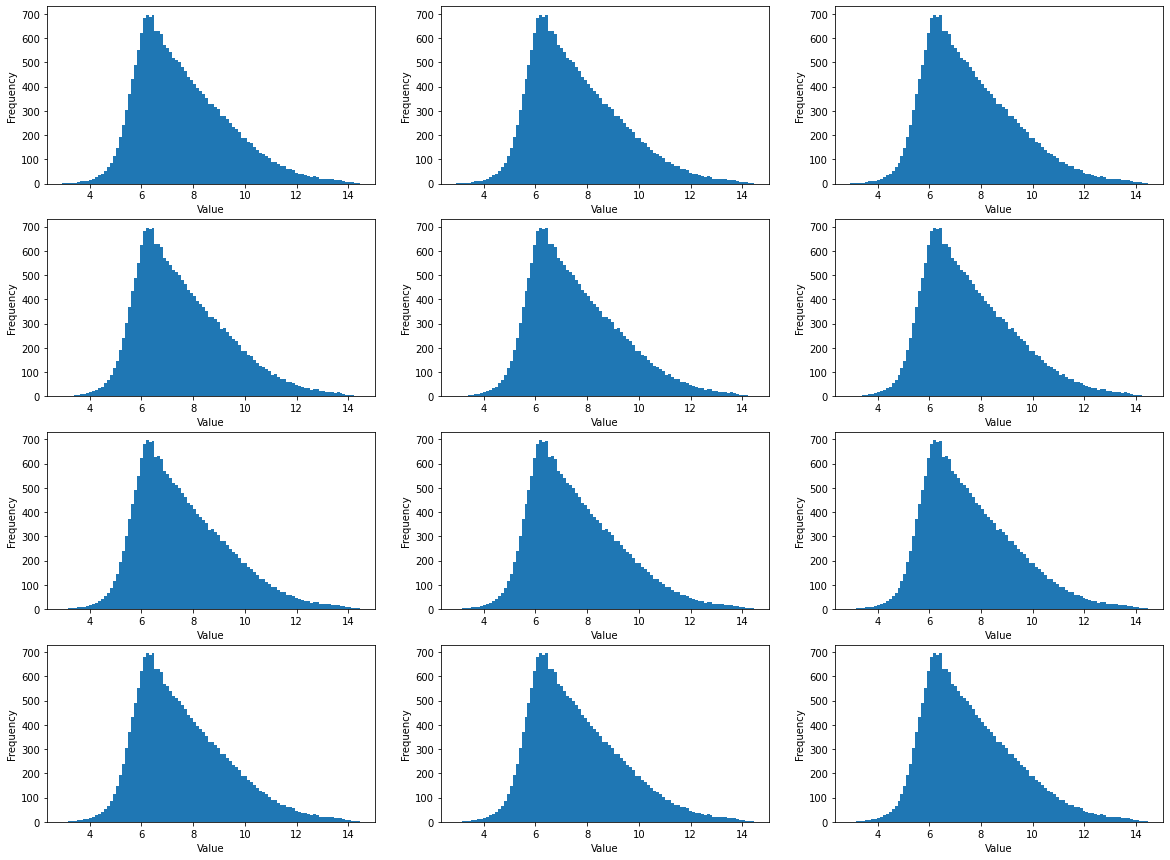

In [18]:
f, ax = plt.subplots(4,3, figsize=(20,15))
# histogram for each column
for i in range(3):
    for j in range(4):
        ax[j,i].hist(data_quantile_normalised.iloc[:,i*3+j], bins=100)
        ax[j,i].set_xlabel('Value', fontsize=10)
        ax[j,i].set_ylabel('Frequency')
plt.show()

#### d. Summarise probes that are linked to the same gene by using the median; i.e. when multiple rows have the same gene label, make them a single row for that gene

In [19]:
data = data_quantile_normalised.groupby('Gene Symbol').median()
data

,CFU,CFU,CFU,Pro,Pro,Pro,Int,Int,Int,Late,Late,Late
Gene Symbol,,,,,,,,,,,,
A1BG-AS1,6.374001,5.877563,6.108864,6.040243,6.162328,6.024840,6.156524,6.277436,6.213709,6.875058,6.803785,7.015223
A4GALT,7.494841,6.809542,7.244968,7.692986,7.350432,7.512970,7.260244,7.477466,7.457574,7.836416,8.092869,8.268841
AAAS,8.340318,7.056046,8.099559,8.356534,7.097772,8.053695,7.087099,7.138728,8.012358,7.422554,7.595379,7.264026
AACS,7.412057,7.619861,7.505477,7.254624,7.424300,7.559494,7.245659,7.025737,7.615121,7.721836,7.144794,6.909265
AAED1,6.973934,6.431362,6.828924,6.679001,6.720242,6.177711,5.503529,5.652704,4.964692,5.355256,5.538590,5.378512
...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX,7.262555,5.637374,6.535870,6.519672,6.052717,6.369530,5.939258,5.608195,6.204404,6.778764,6.563863,6.952223
ZZEF1,6.858405,6.450752,6.290030,6.533254,6.052693,6.505623,6.146644,6.332506,6.622228,6.790789,6.847127,6.808464
ZZZ3,8.433790,8.773192,8.582702,8.175802,8.626522,8.552128,8.326557,8.389887,7.796663,7.834576,8.626721,8.232559


# Task 2:
### PCA dimensionality reduction

##### Way1

In [20]:
scaled_data = StandardScaler().fit_transform(data.T)

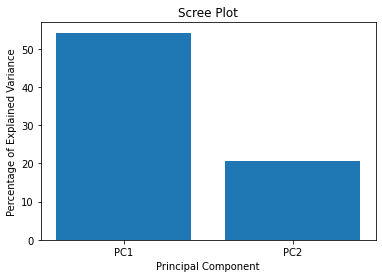

In [24]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
# create a bar plot
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

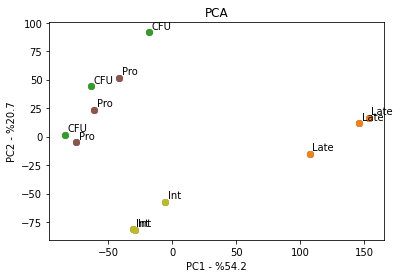

In [68]:
pca_df = pd.DataFrame(pca_data, index=data.columns, columns=labels)
for sample in pca_df.index:
    plt.scatter(x=pca_df.loc[sample, 'PC1'], y=pca_df.loc[sample, 'PC2'], label=sample)

for pos, (x, y) in zip(pca_df.index, pca_df.loc[:, ['PC1', 'PC2']].values):
    plt.annotate(pos, (x + 2, y + 3))
    
plt.title('PCA')
plt.xlabel('PC1 - %{}'.format(per_var[0]))
plt.ylabel('PC2 - %{}'.format(per_var[1]))
plt.show()

##### Way 2

In [86]:
df = data.T
features = df.columns.values
y = df.index.values
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [87]:
df.reset_index(inplace=True)

In [88]:
df.rename(columns={'index': 'Samples'}, inplace=True)
df

Gene Symbol,Samples,A1BG-AS1,A4GALT,AAAS,AACS,AAED1,AAGAB,AAK1,AAMDC,AAMP,...,ZWILCH,ZWINT,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,hsa-let-7a-3,mir-223
0,CFU,6.374001,7.494841,8.340318,7.412057,6.973934,6.911399,6.235309,7.362367,8.783034,...,9.392396,12.095752,5.345618,5.700486,8.079149,7.262555,6.858405,8.433790,5.996376,5.378512
1,CFU,5.877563,6.809542,7.056046,7.619861,6.431362,7.423850,6.740816,7.076363,8.039937,...,9.895644,12.057648,6.175055,6.398169,8.910954,5.637374,6.450752,8.773192,5.946430,7.064299
2,CFU,6.108864,7.244968,8.099559,7.505477,6.828924,7.431270,6.933519,7.246364,8.467840,...,9.679163,11.843770,5.360518,5.940232,8.191922,6.535870,6.290030,8.582702,5.837617,7.472661
3,Pro,6.040243,7.692986,8.356534,7.254624,6.679001,6.903820,6.978042,7.195351,8.378182,...,9.643147,11.931933,4.945880,5.785985,8.408135,6.519672,6.533254,8.175802,5.659934,4.903181
4,Pro,6.162328,7.350432,7.097772,7.424300,6.720242,7.560468,6.460241,7.512545,7.684317,...,9.874971,11.715848,6.372709,6.112903,8.997398,6.052717,6.052693,8.626522,6.050670,5.827817
5,Pro,6.024840,7.512970,8.053695,7.559494,6.177711,7.082238,6.820936,7.248972,8.155667,...,9.566455,11.818244,5.675885,6.059647,8.383835,6.369530,6.505623,8.552128,5.668324,5.481959
6,Int,6.156524,7.260244,7.087099,7.245659,5.503529,7.447271,6.253245,6.893043,7.574552,...,9.701322,11.924290,5.986819,6.837401,8.963788,5.939258,6.146644,8.326557,6.027282,4.379608
7,Int,6.277436,7.477466,7.138728,7.025737,5.652704,7.400307,6.434653,6.915899,7.443264,...,9.746900,11.864765,5.958809,6.905773,9.090369,5.608195,6.332506,8.389887,6.281188,4.157927
8,Int,6.213709,7.457574,8.012358,7.615121,4.964692,6.832946,6.858124,7.101314,7.947837,...,9.387070,11.780113,4.904200,6.555939,8.433181,6.204404,6.622228,7.796663,6.373566,4.853137
9,Late,6.875058,7.836416,7.422554,7.721836,5.355256,6.056977,7.939335,7.212728,8.963652,...,8.466479,10.709257,5.025853,6.434354,8.246340,6.778764,6.790789,7.834576,6.292010,5.776582


In [90]:
pca2 = PCA(n_components=2)
pcs = pca2.fit_transform(x)
pc_df = pd.DataFrame(data=pcs, columns=['PC1', 'PC2'])
findal_df = pd.concat([pc_df, df[['Samples']]], axis=1)

In [91]:
findal_df

,PC1,PC2,Samples
0,-18.323163,91.597727,CFU
1,-84.011737,1.358178,CFU
2,-63.135903,44.143854,CFU
3,-41.205335,51.730810,Pro
4,-75.027985,-4.960309,Pro
5,-60.970492,23.586339,Pro
6,-28.887969,-81.895696,Int
7,-30.200207,-81.400137,Int
8,-5.348899,-57.433799,Int
9,107.331149,-14.961686,Late


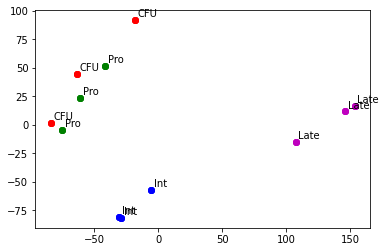

In [96]:
# plot the fndal_df
samples = ['CFU', 'Pro', 'Int', 'Late']
color = ['r', 'g', 'b', 'm']
for sample in findal_df['Samples']:
    plt.scatter(findal_df.loc[findal_df.Samples == sample, 'PC1'], findal_df.loc[findal_df.Samples == sample, 'PC2'], label=sample, color=color[samples.index(sample)])

for pos, (x, y) in zip(findal_df.Samples, findal_df[['PC1', 'PC2']].values):
    plt.annotate(pos, (x + 2, y + 3))

## 3. Task 3 – second round of preprocessing

##### a. Summarise replicates (columns that belong to the same condition) using the median

In [103]:
df_summerized = data.groupby(data.columns, axis=1).median()

In [104]:
df_summerized

,CFU,Int,Late,Pro
Gene Symbol,,,,
A1BG-AS1,6.108864,6.213709,6.875058,6.040243
A4GALT,7.244968,7.457574,8.092869,7.512970
AAAS,8.099559,7.138728,7.422554,8.053695
AACS,7.505477,7.245659,7.144794,7.424300
AAED1,6.828924,5.503529,5.378512,6.679001
...,...,...,...,...
ZYX,6.535870,5.939258,6.778764,6.369530
ZZEF1,6.450752,6.332506,6.808464,6.505623
ZZZ3,8.582702,8.326557,8.232559,8.552128


##### b. Calculate z-scores for rows

In [116]:
mean_table = df_summerized.T.mean()
std = df_summerized.T.std()
zscore = (df_summerized.T - mean_table) / std

In [126]:
zscore.T

,CFU,Int,Late,Pro
Gene Symbol,,,,
A1BG-AS1,-0.522752,-0.249537,1.473859,-0.701570
A4GALT,-0.915622,-0.329500,1.421905,-0.176783
AAAS,0.887437,-1.138287,-0.539893,0.790743
AACS,1.066914,-0.513318,-1.126788,0.573192
AAED1,0.959627,-0.779269,-0.943289,0.762930
...,...,...,...,...
ZYX,0.367738,-1.319742,1.054749,-0.102744
ZZEF1,-0.362977,-0.946258,1.401543,-0.092307
ZZZ3,0.930957,-0.566762,-1.116383,0.752188


##### c. Plot the first 1000 genes data after z-score transformation. You can use this to do so: data.iloc[:1000].T.plot()

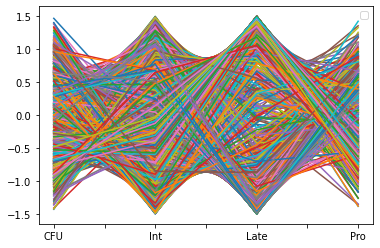

In [150]:
zscore.T.iloc[:1000, :].T.plot()
plt.legend([])

## 4. Task 4 – k-means clustering (20%)

In [170]:
model = skclust.KMeans(n_clusters=5)
clusters = model.fit_predict(zscore.T)

## 5. Task 5 – visualise clusters (20%)

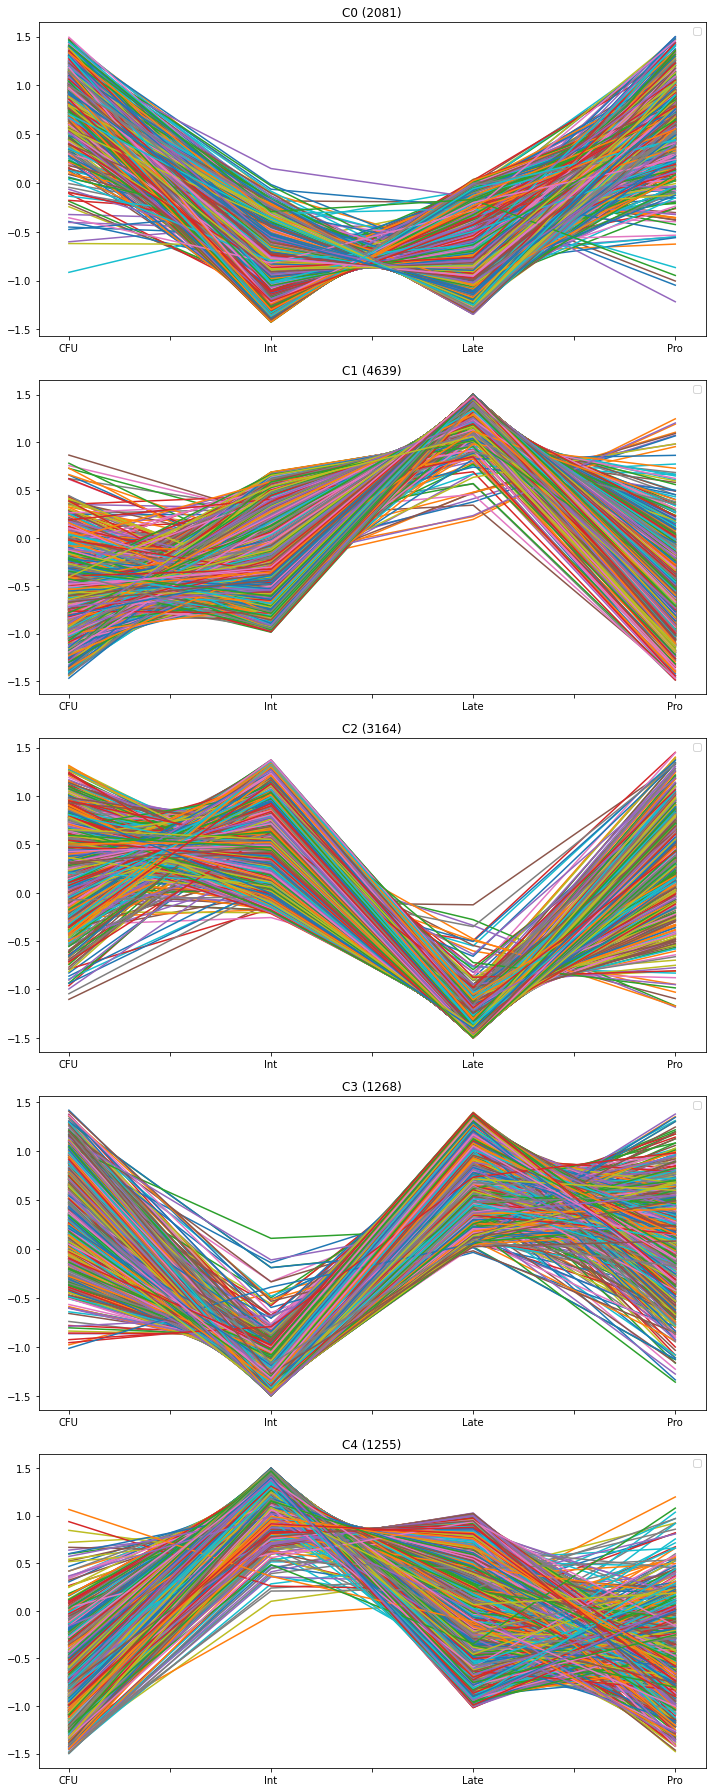

In [171]:
f, ax = plt.subplots(5, figsize=(10,25))

for c in np.unique(clusters):
    zscore.T[clusters == c].T.plot(ax=ax[int(c)])
    ax[int(c)].legend([])
    ax[int(c)].set_title(f"C{c} ({np.sum(clusters == c)})")

plt.tight_layout()